In [140]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
#sns.set(font_scale=1.5)

from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn import decomposition

from sklearn.metrics import completeness_score,silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_mutual_info_score, adjusted_rand_score, homogeneity_score,v_measure_score

In [141]:
#load iris dataset
iris = load_iris()
##iris.keys()

#convert it to dataframe
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(df.shape)
df

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [142]:
col_input = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x = df[col_input].values
y = df['species'].values

In [143]:
def visualize(x, y, title, axes=None):
    
    if len(x[0] > 2):
        pca = decomposition.PCA(n_components=2)
        pca.fit(x)
        x = pca.transform(x)
    
    x0 = [i[0] for i in x]    
    x1 = [i[1] for i in x]
    
    df = pd.DataFrame.from_dict({'x1' : x0, 'x2': x1,
                                'label' : y})
    df["label"] = df["label"].astype(str)
    
    p = sns.scatterplot(ax = axes, data=df, x='x1', y = 'x2', hue='label', legend=None)
    if axes is not None:
        axes.set_title(title)
        if len(set(y)) > 5:
            plt.legend([],[], frameon=False)
    else:
        sns.scatterplot(data=df, x='x1', y = 'x2', hue='label', legend=None)
        plt.show()

    return

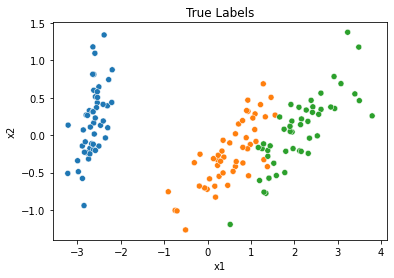

In [144]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
visualize(x, y, 'True Labels', axes)

In [145]:
db_scan = DBSCAN(eps = 0.5, min_samples = 5)
predict = db_scan.fit_predict(features)

In [146]:
def print_metric(x, y, target):
    def get_accuracy(y, target):
        mapping = {}
        
        result = pd.DataFrame.from_dict({'Cluster' : y, 'species' : target})
        
        min_range = -1 if -1 in y else 0
        max_range = None

        max_range = min_range + 3 if len(set(y)) > 3 else min_range + len(set(y))

        range_val = range(min_range, max_range)
        
        for cluster_num in range_val:
            OneCluster = pd.DataFrame(result[result['Cluster'] == cluster_num].groupby('species').size())
            OneCluster.columns=['Size']
            NewDigit = OneCluster.index[OneCluster['Size'] == OneCluster['Size'].max()].tolist()
            NewDigit[0]
            
            rowIndex = result.index[result['Cluster'] == cluster_num]
            result.loc[rowIndex, 'TransLabel'] = NewDigit[0]
        
        Correct = (result['species'] == result['TransLabel']).sum()
        Accuracy = round(Correct/df.shape[0],3)
        print('\t Accuracy : ', Accuracy)
        
    
    try:
        get_accuracy(y, target)
        print('\t Silhouette Score : ', silhouette_score(x, y))
        print('\t David Bouldin Score : ', davies_bouldin_score(x, y))
        print('\t Calinski Harabasz Score : ', calinski_harabasz_score(x, y))
        #print('\t Homogenity Score : ', homogeneity_score(target, y))
        #print('\t Completeness Score', completeness_score(target, y))
        #print('\t V Measure Score', v_measure_score(target, y))
        print('\t Adjusted Random Score', adjusted_rand_score(target, y))
        print('\t Adjusted Mutual Info Score', adjusted_mutual_info_score(target, y))
        
    except Exception as e:
        print('\t',e)

In [147]:
def plot_elbow(dataset, min_sample=3):
    neighbors = NearestNeighbors(n_neighbors=20)
    neighbors_fit = neighbors.fit(dataset)
    distances, indices = neighbors_fit.kneighbors(dataset)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.xlabel('Data points')
    plt.ylabel('Epsilon')
    plt.show()

# Experimenting epsilon parameter

[0] eps : 0.01 Number of clusters :  2
	 Accuracy :  0.347
	 Silhouette Score :  -0.20942917889319423
	 David Bouldin Score :  1.2383824657090163
	 Calinski Harabasz Score :  1.0738793210823248
	 Adjusted Random Score 0.00036284338590934
	 Adjusted Mutual Info Score 0.01092370193843745
[1] eps : 0.05 Number of clusters :  2
	 Accuracy :  0.347
	 Silhouette Score :  -0.20942917889319423
	 David Bouldin Score :  1.2383824657090163
	 Calinski Harabasz Score :  1.0738793210823248
	 Adjusted Random Score 0.00036284338590934
	 Adjusted Mutual Info Score 0.01092370193843745
[2] eps : 0.1 Number of clusters :  5
	 Accuracy :  0.36
	 Silhouette Score :  -0.5334419935757793
	 David Bouldin Score :  0.9424124178614249
	 Calinski Harabasz Score :  2.7675249986678474
	 Adjusted Random Score 0.002668329648317176
	 Adjusted Mutual Info Score 0.039278426524123285
[3] eps : 0.5 Number of clusters :  7
	 Accuracy :  0.653
	 Silhouette Score :  0.19077071508673135
	 David Bouldin Score :  5.8545645307672

<Figure size 432x288 with 0 Axes>

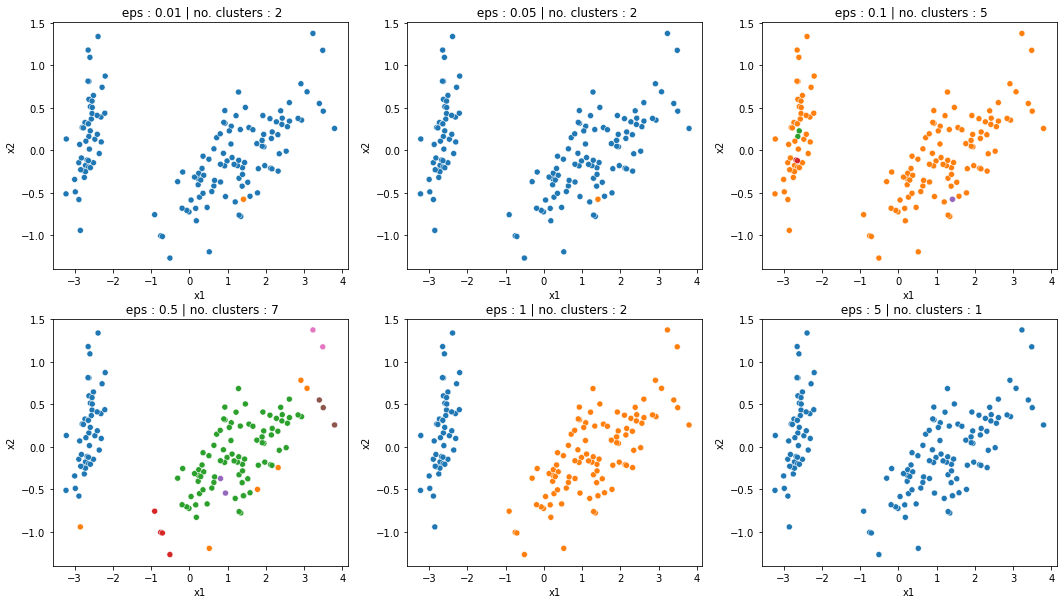

In [148]:
eps_space = [0.01, 0.05, 0.1, 0.5, 1, 5]

plt.figure(1)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i in range(len(eps_space)):
    eps = eps_space[i]
    
    clustering = DBSCAN(eps=eps, min_samples=2).fit(x)
    
    num = len(set(clustering.labels_))

    print(f'[{i}] eps : {eps} Number of clusters : ', num)
    print_metric(x, clustering.labels_, y)
    
    visualize(x, clustering.labels_, f" eps : {eps} | no. clusters : {num}", axes[i//3, i%3])
plt.show()

# Experimenting min_sample parameter

[0] min sample : 1 Number of clusters :  2
	 Accuracy :  0.667
	 Silhouette Score :  0.6867350732769777
	 David Bouldin Score :  0.38275284210068616
	 Calinski Harabasz Score :  502.82156350235897
	 Adjusted Random Score 0.5681159420289855
	 Adjusted Mutual Info Score 0.7315847607219573
[1] min sample : 2 Number of clusters :  2
	 Accuracy :  0.667
	 Silhouette Score :  0.6867350732769777
	 David Bouldin Score :  0.38275284210068616
	 Calinski Harabasz Score :  502.82156350235897
	 Adjusted Random Score 0.5681159420289855
	 Adjusted Mutual Info Score 0.7315847607219573
[2] min sample : 3 Number of clusters :  2
	 Accuracy :  0.667
	 Silhouette Score :  0.6867350732769777
	 David Bouldin Score :  0.38275284210068616
	 Calinski Harabasz Score :  502.82156350235897
	 Adjusted Random Score 0.5681159420289855
	 Adjusted Mutual Info Score 0.7315847607219573
[3] min sample : 4 Number of clusters :  2
	 Accuracy :  0.667
	 Silhouette Score :  0.6867350732769777
	 David Bouldin Score :  0.38275

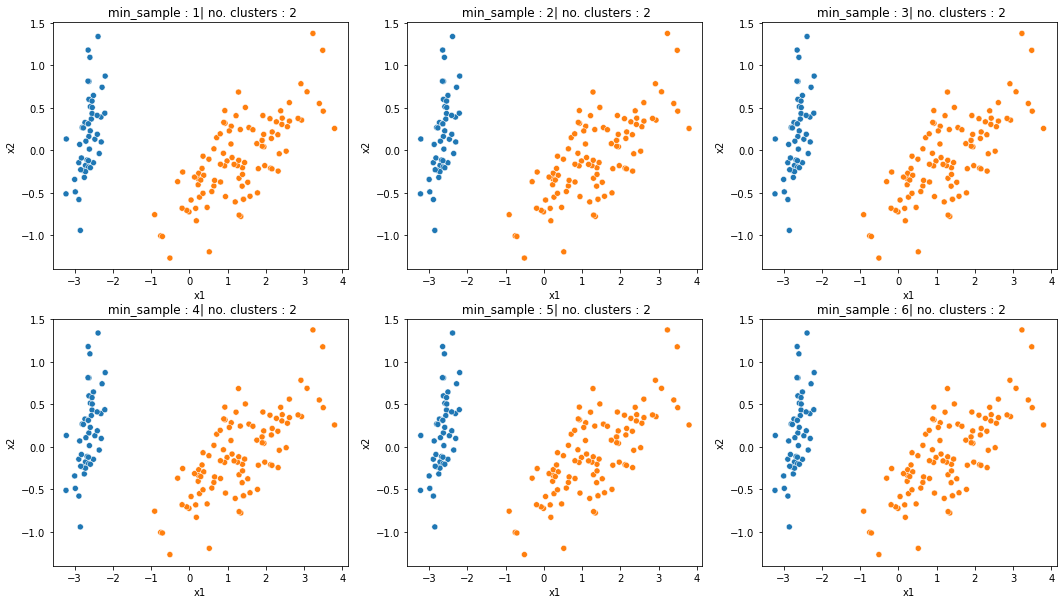

In [149]:
min_sample_space = [1,2,3,4,5,6]
eps = 1
fig, axes = plt.subplots(2, 3, figsize=(18, 10)) 
for i in range(len(min_sample_space)):
    min_sample = min_sample_space[i]  
    
    clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(x)
    
    num = len(set(clustering.labels_))

    print(f'[{i}] min sample : {min_sample} Number of clusters : ', num)
    print_metric(x, clustering.labels_, y)
    visualize(x, clustering.labels_, f" min_sample : {min_sample}| no. clusters : {num}", axes[i//3, i%3])
plt.show()

# Using K-Distance graph to determine the epsilon

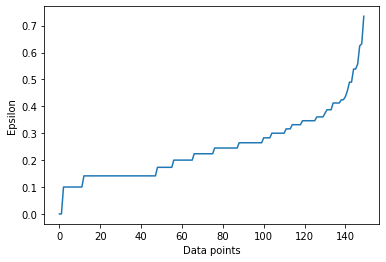

In [150]:
from sklearn.neighbors import NearestNeighbors
plot_elbow(x, min_sample=2)

	 Accuracy :  0.647
	 Silhouette Score :  0.24225508495190032
	 David Bouldin Score :  2.5590668616526013
	 Calinski Harabasz Score :  79.79738891789651
	 Adjusted Random Score 0.7048053311544831
	 Adjusted Mutual Info Score 0.6918872204372657
Number of clusters generated:  8


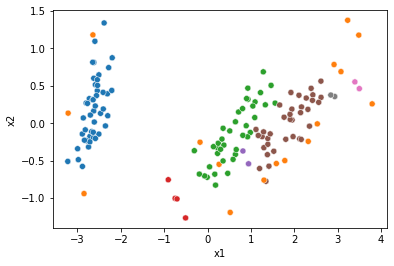

In [151]:
clustering = DBSCAN(eps=0.4, min_samples=2).fit(x)
print_metric(x, clustering.labels_, y)

print("Number of clusters generated: ", len(set(clustering.labels_)))
visualize(x, clustering.labels_, f" min_sample : {min_sample}")

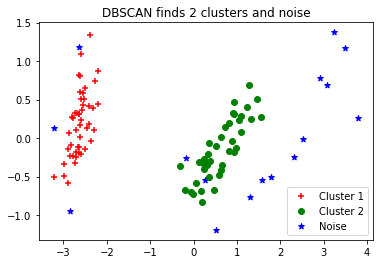

In [158]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x)
pca_2d = pca.transform(x)
for i in range(0, pca_2d.shape[0]):
    if clustering.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
        marker='+')
    elif clustering.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
        marker='o')
    elif clustering.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
        marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2',
    'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()